## First ML Project
Data taken is processed and made usable after which it is split into training and test. Using a random forest model I've trained it to predict the values with 81% accuracy without fine tuning.
Upon basic parameter tuning, accuracy has been increased to 83%

In [57]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 445.2 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 550.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 901.1 kB/s eta 0:00:01
   ------------------------------------ --- 266.2/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 445.2 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 645.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 3.8 MB/s eta 0:00:03
   - -------------------------------------- 0.3/10.6 MB 3.5 MB/s eta 0:00:03
   - -------------------------------------- 0.5/10.6 MB 3.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/10.6 MB 4.1 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/10.6 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/10.6 MB 4.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/10.6 MB 4.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 4.9 MB/s eta 0:00:02
   ------

In [58]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import os
print(os.listdir("input"))

['adult.data', 'adult.names', 'adult.test', 'Index', 'old.adult.names']


In [13]:
data = pd.read_csv("input/adult.data", sep=",", header=None)

In [14]:
data.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
data.dtypes

0      int64
1     object
2      int64
3     object
4      int64
5     object
6     object
7     object
8     object
9     object
10     int64
11     int64
12     int64
13    object
14    object
dtype: object

In [16]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
import pandas as pd
category_labels, category_codes = pd.factorize(data[9])

In [25]:
print(category_labels)

[0 0 0 ... 1 0 1]


In [33]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
with open("input/adult.names", "r") as f:
    feature_names = f.readlines()
column_names = [line.strip().split(":")[0] for line in feature_names]

In [46]:
column_names.append("Amount-earned")
print(column_names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Amount-earned']


In [47]:
data.columns = column_names

In [48]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Amount-earned
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
category_labels, category_codes = pd.factorize(data['education'])

In [50]:
print(category_codes)

Index([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college',
       ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school',
       ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
      dtype='object')


In [51]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

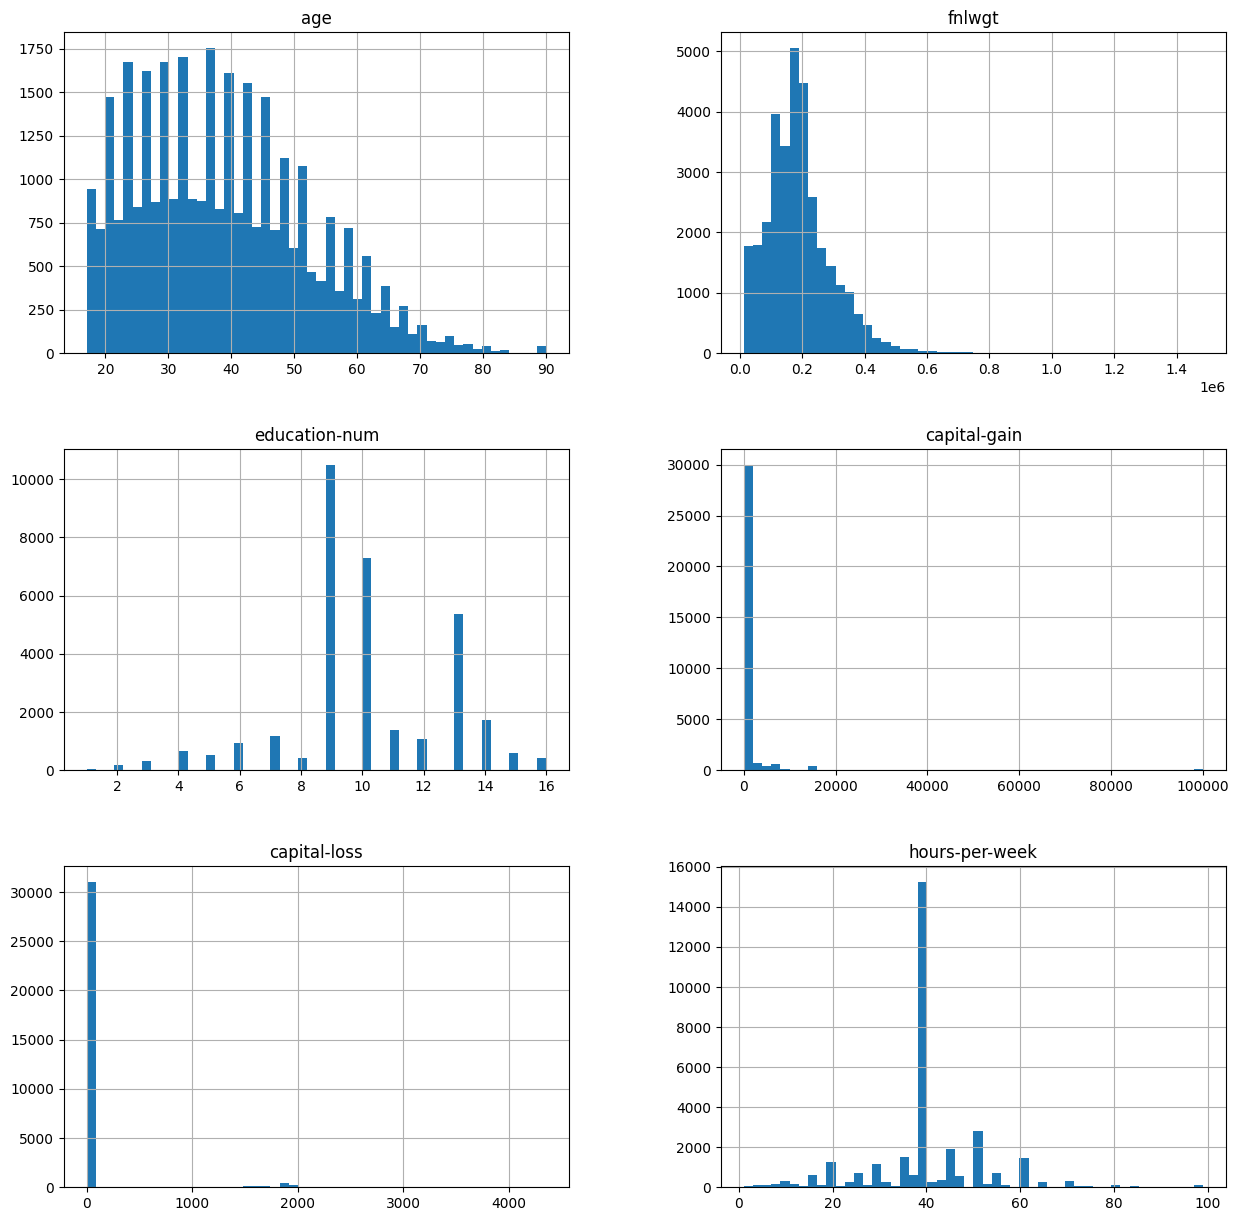

In [59]:
data.hist(bins=50, figsize=(15, 15))

In [64]:
category_labels, category_codes = pd.factorize(data['occupation'])
print(category_codes)

Index([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'],
      dtype='object')


In [63]:
from sklearn.preprocessing import LabelEncoder

In [80]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Amount-earned
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [83]:
le= LabelEncoder()
data_pro=data.apply(le.fit_transform)

In [84]:
data_pro.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Amount-earned
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [93]:
from sklearn.model_selection import train_test_split
features=["age","workclass","education-num","occupation","race","sex","capital-gain","hours-per-week","native-country"]
x=data_pro[features]
req=["Amount-earned"]
y=data_pro[req]
train_x,val_x,train_y,val_y=train_test_split(x,y,random_state=0)

In [167]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_leaf_nodes=500,random_state=0)
model.fit(train_x,train_y)
predicted=model.predict(val_x)
print(predicted)

C:\Users\sebin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.04836073 0.08458918 0.02615829 ... 0.25426448 0.77051012 0.12528251]


In [168]:
val_y

,Amount-earned
22278,0
8950,0
7838,0
16505,0
19140,1
...,...
4149,0
17168,0
21748,0
18155,1


In [169]:
predicted_replaced= np.where(predicted>0.5,1,0)
print(predicted_replaced)

[0 0 0 ... 0 1 0]


In [170]:
mismatches = np.sum(val_y["Amount-earned"] != predicted_replaced)

In [171]:
print(mismatches)

1359


In [172]:
print(len(predicted_replaced))

8141


In [173]:
acc=(1-(mismatches/len(predicted_replaced)))*100
acc

83.30671907628056